# 3D SARS-CoV-19 Protein Visualisation With Biopython

## Biopython

<div class="alert alert-block alert-info" style="Font-size:16px">
    
- Set of **tools** for **Biological computation**<br>
- Written in **Python**<br>
- Distributed **collaborative effort** to develop Python libraries and applications<br>
- Address the needs of current and future work in **Bioinformatics**<br>
    
</div>

### Applications

<div class="alert alert-block alert-success" style="Font-size:15px">
    
1. **Sequence Analysis** (DNA/RNA/Protein)<br>
2. **Transcription** & **Translation studies**<br>
3. Accessing **Bioinformatics Databases**<br>
a. NCBI<br>
b. PDB<br>

4. **3D Structure** Analysis
</div>

# Table of contents:<br>
1. [Attributes of Biopython](#1.-Attributes-of-Biopython)
2. [Understand FASTA file format](#2.-Understanding-FASTA-file-format)
3. [Sequence manipulation using Biopython](#3.-Sequence-manipulation-using-Biopython)
4. [Transcription & Translation studies](#4.-Transcription-&-Translation-Studies)
5. [Perform Basic Local Alignment using NCBI-BLAST](#5.-Basic-Local-Alignment-Using-NCBI-BLAST)
6. [Reading PDB file](#6.-Reading-PDB-file)
7. [Visualizing SARS-CoV-19 Protein structure](#7.-Visualizing-SARS-CoV-19-Protein-structure)

## Modules

In [22]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [23]:
import Bio
print(Bio.__version__)

1.83


In [24]:
pip install --upgrade --force-reinstall biopython


  Using cached biopython-1.83-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached biopython-1.83-cp312-cp312-win_amd64.whl (2.7 MB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: biopython
    Found existing installation: biopython 1.83
    Uninstalling biopython-1.83:
      Successfully uninstalled biopython-1.83
Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install nglview

Note: you may need to restart the kernel to use updated packages.


In [26]:
def gc_content(seq):
    return 100.0 * sum(seq.count(x) for x in ['G', 'C']) / len(seq)

# Example usage:
seq = Seq("AGTACACTGGT")
print(gc_content(seq))

45.45454545454545


In [28]:
import Bio
import pylab
import urllib
import pandas as pd
# Ensure nglview is properly installed if you intend to use it, and adjust accordingly.
from Bio.Seq import Seq
from Bio.Blast import NCBIWWW
# Removed import Bio.Alphabet as it is deprecated.
from collections import Counter
from Bio.Data import CodonTable
from Bio import SeqIO, SearchIO
from Bio.PDB import PDBParser, MMCIFParser
# Bio.SeqUtils.GC removed, will define a GC content function manually.
# Removed imports from Bio.Alphabet as it is deprecated.

# Define a manual function for GC content calculation.
def gc_content(seq):
    return 100.0 * sum(seq.count(x) for x in ['G', 'C']) / len(seq)

# Since importing molecular_weight directly is problematic, consider using an alternative approach or manually calculating it based on your requirements.

# Example usage of the gc_content function:
seq = Seq("AGTACACTGGT")
print(f"GC Content: {gc_content(seq)}%")

# You might need to adapt your usage of molecular_weight based on specific needs, potentially using alternative methods or manual calculations if necessary.

GC Content: 45.45454545454545%


## 1. Attributes of Biopython

In [ ]:
# Check Attributes of Biopython


In [29]:
# Check attributes of BioPython
dir(Bio)

['Align',
 'BiopythonDeprecationWarning',
 'BiopythonExperimentalWarning',
 'BiopythonParserWarning',
 'BiopythonWarning',
 'Blast',
 'Data',
 'File',
 'GenBank',
 'MissingExternalDependencyError',
 'MissingPythonDependencyError',
 'PDB',
 'SVDSuperimposer',
 'SearchIO',
 'Seq',
 'SeqFeature',
 'SeqIO',
 'SeqRecord',
 'SeqUtils',
 'Sequencing',
 'StreamModeError',
 'SwissProt',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_parent_dir',
 '_utils',
 'os',
 'warnings']

## 2. Understanding FASTA file format

#### SEQUENCE SOURCE

<a href="https://www.ncbi.nlm.nih.gov/nuccore/MN908947.3?report=fasta"> **SARS-CoV-19 SEQUENCE FROM NCBI**<a>

### GENETIC MATERIAL

<div class="alert alert-block alert-info" style="Font-size:16px">

**DNA** (Deoxy-Ribonucleic Acid) constitutes of 4 Bases **A T G C**<br>
**RNA** (Ribonucleic Acid) is composed of **U** instead of **T**<br>
    
</div>

### 2.1. FASTA Format

### FASTA File

    
**\> Description_of_DNA_sequence**
<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>
ATGCTGCGAGACAGACAGACATACTATCATCTCAGACGCAG<br>


In [39]:
from Bio import SeqIO

# Replace the path below with the actual path to your FASTA file
seq_file_read = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\sequence.fasta"

# Reading the FASTA file
for seq_record in SeqIO.parse(seq_file_read, "fasta"):
    print(f"ID: {seq_record.id}")
    print(f"Description: {seq_record.description}")
    print(f"Sequence: {seq_record.seq}\n")


ID: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Sequence: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCAT

### 2.2. Reading from file

In [44]:
from Bio import SeqIO

# Corrected file path to match the provided path
seq_file_path = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\sequence.fasta"

# Loading the FASTA file
seq_file_read = SeqIO.read(seq_file_path, "fasta")
print(seq_file_read)


ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')


In [45]:
type(seq_file_read)

Bio.SeqRecord.SeqRecord

### 2.3 Sequence details

In [46]:
# list sequence details
seq_file_read.id

'MN908947.3'

In [47]:
seq_file_read.seq

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [48]:
seq_file_read.id

'MN908947.3'

In [51]:
seqfromfile = seq_file_read.seq
print(seqfromfile)

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [55]:
from Bio import SeqIO

# Corrected file path to point to a FASTA file, not a notebook
fasta_file_path = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\sequence.fasta"

# Using SeqIO.parse to read the FASTA file
for record in SeqIO.parse(fasta_file_path, "fasta"):
    print(f"ID: {record.id}")
    print(f"Name: {record.name}")
    print(f"Description: {record.description}")
    print(f"Sequence length: {len(record.seq)}")
    print(f"Sequence: {record.seq}\n")


ID: MN908947.3
Name: MN908947.3
Description: MN908947.3 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Sequence length: 29903
Sequence: ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATA

In [57]:
# store sequence for later analysis
seqfromfile = record.seq
seqfromfile

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [58]:
# length of sequence
len(seqfromfile)

29903

In [60]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight

# Assuming you have a FASTA file with your sequence
fasta_file_path = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\sequence.fasta"

# Reading the sequence from the file. This assumes the file contains a single sequence.
seq_record = SeqIO.read(fasta_file_path, "fasta")

# Calculating the molecular weight of the sequence
# The molecular_weight function assumes linear DNA by default. 
# You can specify the type (e.g., circular DNA, RNA, or protein) using the `circular` and `seq_type` parameters if needed.
mw = molecular_weight(seq_record.seq)

print(f"Molecular Weight: {mw}")


Molecular Weight: 9241219.214399999


## 3. Sequence manipulation using Biopython

<div class="alert alert-block alert-warning" style="Font-size:16px">
- indexing/slicing<br>
- concatination<br>
- codon search<br>
- GC content<br>
- complement<br>

</div>

### 3.1. Indexing / Slicing

In [61]:
# CODON
seqfromfile[0:4]

Seq('ATTA')

In [63]:
seqfromfile[0:3]+seqfromfile[-3:]

Seq('ATTAAA')

### 3.2. Concatination

In [64]:
concat = seqfromfile[:6]+seqfromfile[-5:]
concat

Seq('ATTAAAAAAAA')

### 3.3. Codon Search

In [65]:
seqfromfile.find('AGA')

54

### 3.4. GC Content

# A very important measure to quantify the quality of DNA sequence is the G C that is Guanine and Cytosine content because Higher G C content implies that a DNA is stable. The reason behind this being G and C form triple hydrogen bonds. So the basic logic to calculate GC content would be to add the total number of G and C and divide by the length of the sequence.

In [66]:
# LOGIC
(seqfromfile.count('G')+seqfromfile.count('C')) /(len(seqfromfile))*100

37.97277865097147

# GC Content using Biopython

In [72]:
from Bio import SeqIO
from Bio.SeqUtils import GC

# Assuming you have a FASTA file with your sequence
fasta_file_path = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\sequence.fasta"

# Reading the sequence from the file. This assumes the file contains a single sequence.
seq_record = SeqIO.read(fasta_file_path, "fasta")

# Now we have the sequence in seq_record.seq, let's calculate its GC content
gc_content = GC(seq_record.seq)

print(f"GC Content: {gc_content}%")


ImportError: cannot import name 'GC' from 'Bio.SeqUtils' (C:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\SeqUtils\__init__.py)

In [70]:
from Bio import SeqIO

def gc_content(seq):
    return 100.0 * sum(1 for base in seq if base in ['G', 'C']) / len(seq)

# Assuming you have a FASTA file with your sequence
fasta_file_path = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\sequence.fasta"

# Reading the sequence from the file. This assumes the file contains a single sequence.
seq_record = SeqIO.read(fasta_file_path, "fasta")
seq = seq_record.seq

# Calculating the GC content manually
gc = gc_content(seq)
print(f"GC Content: {gc}%")


GC Content: 37.97277865097148%


#### This cell we'll get the GC content. DNA always occurs as a double stranded biomolecule that is two single stranded DNA combine to form a double strandard, stable structure. This occurs due a process called base pairing, which is nothing but A binds to T to form a pair of nucleotide bases. Similarly, G almost always binds to C to from a base pair. Nucleotides in a base pair are complementary, which means, their shape allows them to bond together with hydrogen bonds, then A-T pair forms two hydrogen bonds and the G-C pair froms three hydrogen bonds.

### 3.5. Complement

#### Since we have only one strand of DNA in our FASTA file we can find its complementary Strand by using a python's built in function compliment let's try to find the compliment of the first, ten nucleotide bases

<div class="alert alert-block alert-info" style="Font-size:16px">

In **DNA** <br>
    **A** Bonds with **T** (DOUBLE BOND)<br>
    **G** Bonds with **C** (TRIPLE BOND)<br>
    
</div>

In [75]:
seqfromfile[:11]

Seq('ATTAAAGGTTT')

In [74]:
# complement
seqfromfile[:11].complement()

Seq('TAATTTCCAAA')

#### Let's try this out, sequence from file I want to type the same 10 base pairs, but this time we'll use reverse complement by running this cell we'll get the reverse complement of our sequence reverse Complement Function takes the complement sequence and reverses it to forward direction that is 5 prime to three prime direction.

In [77]:
#reverse complement
seqfromfile[:11].reverse_complement()


Seq('AAACCTTTAAT')

#### Since we're printing the last 10 we will have to specify minus 10 and reverse complement. that concludes our third task here we applied basic python indexing techniques to fetch a specific section of the biological sequence, Calculated GC content and searched for codons and complement sequences using biopython modules.

In [80]:
seqfromfile[-10:].reverse_complement()

Seq('TTTTTTTTTT')

## 4. Transcription & Translation Studies

<div class="alert alert-block alert-warning" style="font-size:16px">
DNA > RNA = Transcription
</div>
<div class="alert alert-block alert-warning" style="font-size:16px">
mRNA > amino acid (protein) = Translation
</div>

#### Before we begin Coding, let me explain how transcription and translation work, as we already know our genetic material. DNA, which forms the track for all the biological processes to kick-start is first converted into another chain called RNA which stands for ribonucleic acid This process is called transcription that is DNA is transcribed to RNA in this process. Following transcription, another process occurs. that is translation here only a specific type of RNA namely mRNA is translated to form an amino acid sequence which, after modification and folding, becomes a protein. Both transcription and translation. are mediated by special enzymes in our body. To learn more about these complex processes, you can refer to the link given at the end of this Jupyter notebook.

### 4.1. Transcription

#### Let us conduct this beautiful, state of the art process virtually using biopython. A DNA sequence can be transcribed using the transcribe function. The basic logic behind this process is converting all the T, thymine nucleotide bases from a  DNA sequence to a Uracil that is U nucleotide bases, which makes it an RNA sequence

In [82]:
#Transcribe
mRNA = seqfromfile.transcribe()
mRNA[:10]


Seq('AUUAAAGGUU')

#### All the T nucleotide Bases have been replaced by U in case we have an RNA sequence from an experiment, we can get back the DNA by using a function known as back transcribe, let's try this out. 

In [83]:
#Back transcribe

mRNA.back_transcribe()

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

### 4.2. Translation

#### here as you can see all the U nucleotide bases have been changed to T nucleotide bases. Both transcription and reverse transcription occurs in a living cell. now the question is, can the 4 nucleotide bases  in DNA code for 20 plus amino acids which make up a protein sequence? recall from task three I used a term CODON which stands for sequence of three nucleotide bases and each combination of these codons, corresponds with a specific amino acid or stop signal during protein  synthesis, that is nucleotide bases In triplets code for amino acids which give rise to three to the power four combinations, which is more than sufficient number to code for amino acids which make up the proteins. To find out which CODON codes which amino acid We can use the command codon table

In [84]:
print(CodonTable.unambiguous_dna_by_id[1])

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

#### Displays a table with a list of possible nucleotide combinations, and the amino acids the ones marked as S in brackets are the stop codons, which serve as stop signals during protein synthesis, now to translate our sequence into a protein, let's create a variable named protein sequence into this we'll pass our sequence and translate.

In [85]:
protein_seq = seqfromfile.translate()
protein_seq[:10]

C:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\Seq.py:2880: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


Seq('IKGLYLPR*Q')

In [86]:
len(protein_seq)

9967

In [87]:
len(seqfromfile)

29903

#### You will see that the number has decreased by three times compared to the initial sequence. Length, since three nucleotides code for a single amino Acid. now the question is, can we reverse Translate this protein into DNA or RNA like we did with mRNA ?

### Can protein sequences be reverse translated ?
<div class="alert alert-block alert-info">
<b>Note</b> : there is no function called `back_translate` so we'll make use of `back_transcribe`.
</div>

In [88]:
protein_seq.back_transcribe()

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

### This error is true for all the biological life too...
<div class="alert alert-block alert-warning">
- we can't perform an exact "reverse translation" of course, since several amino acids are produced by the same codon.
</div>

In [ ]:
print(CodonTable.unambiguous_dna_by_id[1])

#### Next lets try counting. How many amino acids we have, for this purpose we will use the counter function. Let's create a variable named, common amino and to this We will use a counter function. within which we will pass our protein sequences. from this list lets fetch the first 10 amino acids by using the most common function. most underscore common and within this we'll pass 10 most common amino acid and run this cell, It will give you a list of 10 most Common amino acids from our sequence.

In [89]:
# Listing the most common amino acids
common_amino = Counter(protein_seq)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [ ]:
####  We can visualise all twenty Amino acids occurrences in the form of histogram. we will use PYLAB which is packed into matplotlib module, for this function first let's drop the stop codon which is represented by star.

Text(0, 0.5, 'frequency')

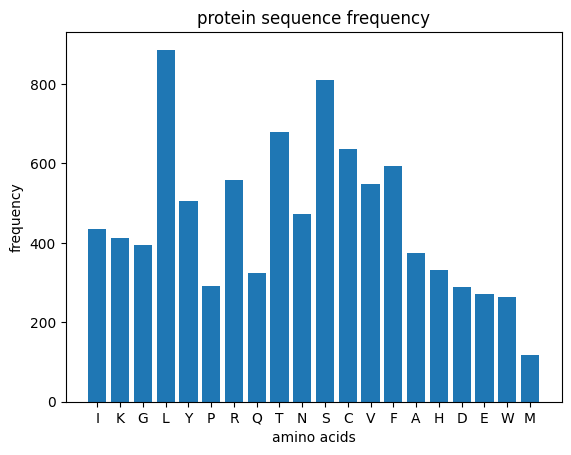

In [91]:
# visualize all 20 amino acid occurrences in the form of a histogram

del common_amino['*']

pylab.bar(common_amino.keys(),common_amino.values())

pylab.title("protein sequence frequency")

pylab.xlabel("amino acids")
pylab.ylabel("frequency")

#### it is evident from the graph that L and S which stands for Leucine and Serine occurs most frequently, which is essential amino acids used in biosynthesis of proteins.

### Since stop codon * signifies end of a protein we can split the sequence using ( * )

In [92]:
protein_list = [str(i) for i in protein_seq.split('*')]
protein_list[:10]

['IKGLYLPR',
 'QTNQLSISCRSVL',
 'TNFKICVAVTRLHA',
 'CTHAV',
 'LITNYCR',
 'QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER',
 'DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS',
 'RWHLWLSRS',
 'KRRFAST',
 'TALCVHQTFGCSNCTSWSCYG']

In [93]:
# convert sequences to dataframe
large_proteins = [x for x in protein_list if len(x)>10]
df = pd.DataFrame({'protein_seq': large_proteins})

In [95]:
# Add a column with sequence lengths
df['length'] = df['protein_seq'].apply(len)
df.head()


,protein_seq,length
0,QTNQLSISCRSVL,13
1,TNFKICVAVTRLHA,14
2,QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER,35
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
4,TALCVHQTFGCSNCTSWSCYG,21


In [96]:
# sort sequence data
df.sort_values(by = ['length'],ascending=False) [:10]

,protein_seq,length
118,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
157,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
168,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
158,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
167,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63
3,DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS,46
93,TMLRCYFPKCSEKNNQGYTPLVVTHNFDFTFSFSPEYSMVFVLFFV,46
188,KSHHIFTEATRSTIECTVNNARESCLYGRALMCKINFSSAIPM,43
116,DVVYTHWYWSGNNSYTGSQYGSRILWWCIVLSVLPLPHRSSKS,43
182,LQTLAANCTICPQRFSVLRNVAHWHGSHTFGNVVDLHRCHQIG,43


In [98]:
# let's take a single protein from the table

one_large_protein = df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]
single_prot

'CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSY

In [100]:
import os

# Define the full path for the directory where you want to save the file
directory = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid"

# Ensure the directory exists (although it likely already does, given the specified path)
if not os.path.exists(directory):
    os.makedirs(directory)

# Define the full path for the file within the specified directory
file_path = os.path.join(directory, "single_prot.fasta")

# Write to the file
with open(file_path, "w") as file:
    file.write(">large protein\n" + str(single_prot))  # Ensure single_prot is a string


## 5. Basic Local Alignment Using NCBI-BLAST

In [102]:
# Read single_seq.fasta
from Bio import SeqIO

# Correct file path
file_path = r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\single_prot.fasta"

# Read the sequence from the FASTA file
read = SeqIO.read(file_path, "fasta")

# Print the sequence
print(read.seq)


CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQEKDEDDNLIDSYFVVKRHTFSNYQHEETIYNLLKDCPAVAKHDFFKFRIDGDMVPHISRQRLTKYTMADLVYALRHFDEGNCDTLKEILVTYNCCDDDYFNKKDWYDFVENPDILRVYANLGERVRQALLKTVQFCDAMRNAGIVGVLTLDNQDLNGNWYDFGDFIQTTPGSGVPVVDSYYSLLMPILTLTRALTAESHVDTDLTKPYIKWDLLKYDFTEERLKLFDRYFKYWDQTYHPNCVNCLDDRCILHCANFNVLFSTVFPPTSFGPLVRKIFVDGVPFVVSTGYHFRELGVVHNQDVNLHSSRLSFKELLVYAADPAMHAASGNLLLDKRTTCFSVAALTNNVAFQTVKPGNFNKDFYDFAVSKGFFKEGSSVELKHFFFAQDGNAAISDYDYYRYNLPTMCDIRQLLFVVEVVDKYFDCYDGGCINANQVIVNNLDKSAGFPFNKWGKARLYYDSMSYEDQDALFAYTKRNVIPTITQMNLKYAISAKNRARTVAGVSICSTMTNRQFHQKLLKSIAATRGATVVIGTSKFYGGWHNMLKTVYSDVENPHLMGWDYPKCDRAMPNMLRIMASLVLARKHTTCCSLSHRFYRLANECAQVLSEMVMCGGSLYVKPGGTSSGDATTAYANSVFNICQAVTANVNALLSTDGNKIADKYVRNLQHRLYECLYRNRDVDTDFVNEFYAYLRKHFSMMILSDDAVVCFNSTYASQGLVASIKNFKSVLYYQNNVFMSEAKCWTETDLTKGPHEFCSQHTMLVKQGDDYVYLPYPDPSRILGAGCFVDDIVKTDGTLMIERFVSLAIDAYPLTKHPNQEYADVFHLYLQYIRKLHDELTGHMLDMYSVMLTNDNTSRYWEPEFYEAMYTPHTVLQAVGACVLCNSQTSLRCGACIRRPFLCCKCCYDHVISTSHKLVLSVNPYVCNAPGCDVTDVTQLYLGGMSYY

In [103]:
%%time

# based on the server load this query might take 2-3 minutes to run

result_handle = NCBIWWW.qblast("blastp","pdb",read.seq)
blast_qresult = SearchIO.read(result_handle,"blast-xml")

CPU times: total: 46.9 ms
Wall time: 1min 2s


In [104]:
print(blast_qresult[0:5])

Program: blastp (2.15.0+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...


In [105]:
#fetch the id, description, evalue, bitscore & alignment of first hit

seqid = blast_qresult[0]

details = seqid[0]

print(f"\
Sequence ID:{seqid.id}\n\
description:{seqid.description}\n\
E value:    {details.evalue} \n\
Bit Score:  {details.bitscore}\n\
")

Sequence ID:pdb|7D4F|A
description:Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
E value:    0.0 
Bit Score:  1938.7



In [ ]:
print(f"alignment:\n{details.aln}")

## 6. Reading PDB file

### Retreiving PDB Structure From RCSB PDB

In [107]:
seqid.id

'pdb|7D4F|A'

In [108]:
# split seqid

seqid.id.split('|')[1]

'7D4F'

In [110]:
# link format https://files.rcsb.org/download/6YYT.pdb

urllib.request.urlretrieve('https://files.rcsb.org/download/6YYT.pdb','C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid/7D4F.pdb')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2778254436.py, line 3)

### 6.1 Reading PDB file

In [1]:
parser = PDBParser()
structure = parser.get_structure("7D4F", r"C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\7D4F.pdb")
structure

NameError: name 'PDBParser' is not defined

### 6.2 Identifying the number of chains

In [2]:
for chain in structure[0]:
    print(f"chain ID: {chain.id}")

NameError: name 'structure' is not defined

In [3]:
pip install ipywidgets --upgrade


Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install --upgrade ipywidgets


In [5]:
import sys
print(sys.executable)

C:\Users\oscar\AppData\Local\Programs\Python\Python312\python.exe


## 7. Visualizing SARS-CoV-19 Protein structure

### 7.1. nglview

In [9]:
pip install nglview


In [33]:
import nglview as nv


In [34]:
nv.demo()

NGLWidget()

In [35]:
view = nv.show_biopython(structure)
view


NGLWidget()

In [36]:
pdb_file_path = r'C:\Users\oscar\OneDrive\Oscar\Projects\Biopython_Covid\7D4F.pdb'


In [37]:
from Bio.PDB import PDBParser
import nglview as nv

# Initialize the PDB parser
parser = PDBParser()

# Parse the structure from the PDB file
structure = parser.get_structure('7D4F', pdb_file_path)

# Visualize the structure with NGLview
view = nv.show_biopython(structure)
view


C:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\Bio\PDB\StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 12059.
  warnings.warn(


NGLWidget()

In [38]:
view.render_image()

Image(value=b'', width='99%')

### 7.2. nglview GUI

In [39]:
#GUI
nv.show_biopython(structure,gui=True)


NGLWidget()

## Observation:<br>
<div style="Font-size:16px">
A. Length 29903 base pairs<br>
B. GC content 37.97<br>
C. Protein content has high L & the largest protein is of length 2701 Amino acid<br>
D. Largest protein BLAST results corresponds to <b>SARS-CoV-19</b> 6YYT <br>
E. Protein 6YYT has 8 chains & a DNA binding domain<br>
</div>

## Further Reading
1. [**Transcription & Translation**](https://www.nature.com/scitable/topicpage/translation-dna-to-mrna-to-protein-393/)
2. [**Biopython Tutorial and Cookbook**](http://biopython.org/DIST/docs/tutorial/Tutorial.html)